In [3]:
import nltk
import numpy as np
from collections import Counter

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [6]:
positive_words_clean = """
(:
(-:
:)
:-)
:D
;)
;-)
ability
amazing
attractive
awesome
beautiful
best
blessing
bonus
boon
clean
comfort
comfortable
compliment
complimentary
correct
correctly
decent
decently
dedicated
delectable
delicious
delight
delightful
dependable
dream
dreamy
effective
efficient
enjoy
enjoyable
enthusiasm
enthusiastic
exceptional
exhilirating
fast
favor
favorite
favourite
fine
flair
flawless
fortune
friendly
glad
godsend
good
gratifying
gratifyingly
great
happily
happiness
happy
health
healthiness
healthy
heavenly
hospitable
inviting
joy
joyous
kindness
knowledgeable
lol
lovely
loyal
mastery
neat
nice
perfect
pleasant
pleasing
pleasurable
pleasure
polished
pretty
prosperity
refined
reliable
rofl
satisfactory
satisfying
satisfyingly
savory
specialty
stunning
success
successful
sweet
tasty
tidy
warm
welcome
well
well-being
wellness
windfall
"""

In [7]:
positive_words_clean

'\n(:\n(-:\n:)\n:-)\n:D\n;)\n;-)\nability\namazing\nattractive\nawesome\nbeautiful\nbest\nblessing\nbonus\nboon\nclean\ncomfort\ncomfortable\ncompliment\ncomplimentary\ncorrect\ncorrectly\ndecent\ndecently\ndedicated\ndelectable\ndelicious\ndelight\ndelightful\ndependable\ndream\ndreamy\neffective\nefficient\nenjoy\nenjoyable\nenthusiasm\nenthusiastic\nexceptional\nexhilirating\nfast\nfavor\nfavorite\nfavourite\nfine\nflair\nflawless\nfortune\nfriendly\nglad\ngodsend\ngood\ngratifying\ngratifyingly\ngreat\nhappily\nhappiness\nhappy\nhealth\nhealthiness\nhealthy\nheavenly\nhospitable\ninviting\njoy\njoyous\nkindness\nknowledgeable\nlol\nlovely\nloyal\nmastery\nneat\nnice\nperfect\npleasant\npleasing\npleasurable\npleasure\npolished\npretty\nprosperity\nrefined\nreliable\nrofl\nsatisfactory\nsatisfying\nsatisfyingly\nsavory\nspecialty\nstunning\nsuccess\nsuccessful\nsweet\ntasty\ntidy\nwarm\nwelcome\nwell\nwell-being\nwellness\nwindfall\n'

In [8]:
positive_words = positive_words_clean.replace("\n"," ")

In [9]:
POSITIVE_LIST = positive_words.split()

In [10]:
POSITIVE_LIST

['(:',
 '(-:',
 ':)',
 ':-)',
 ':D',
 ';)',
 ';-)',
 'ability',
 'amazing',
 'attractive',
 'awesome',
 'beautiful',
 'best',
 'blessing',
 'bonus',
 'boon',
 'clean',
 'comfort',
 'comfortable',
 'compliment',
 'complimentary',
 'correct',
 'correctly',
 'decent',
 'decently',
 'dedicated',
 'delectable',
 'delicious',
 'delight',
 'delightful',
 'dependable',
 'dream',
 'dreamy',
 'effective',
 'efficient',
 'enjoy',
 'enjoyable',
 'enthusiasm',
 'enthusiastic',
 'exceptional',
 'exhilirating',
 'fast',
 'favor',
 'favorite',
 'favourite',
 'fine',
 'flair',
 'flawless',
 'fortune',
 'friendly',
 'glad',
 'godsend',
 'good',
 'gratifying',
 'gratifyingly',
 'great',
 'happily',
 'happiness',
 'happy',
 'health',
 'healthiness',
 'healthy',
 'heavenly',
 'hospitable',
 'inviting',
 'joy',
 'joyous',
 'kindness',
 'knowledgeable',
 'lol',
 'lovely',
 'loyal',
 'mastery',
 'neat',
 'nice',
 'perfect',
 'pleasant',
 'pleasing',
 'pleasurable',
 'pleasure',
 'polished',
 'pretty',
 'prosp

In [11]:
negative_words_clean = """
):
)-:
:(
:-(
affliction
anger
angry
awfully
awkward
bad
bother
can't
cheap
clumsy
curse
D:
damage
damaging
defective
deficient
deplorably
depressed
depressing
dirty
disadvantage
disagreeable
disappoint
disappointed
disappointing
disastrously
disgust
disgusting
disheartening
dismal
displeasing
distasteful
distress
distressful
distressing
disturb
disturbing
don't
dreadfully
dreary
enrage
enraging
evil
forbidding
gloomy
god-awful
hate
hateful
hellish
horrendously
horribly
horridly
hostile
ignorant
ill
ill-being
improper
inadequate
inappropriate
inappropriately
incompetent
incorrect
incorrectly
inferior
infuriate
infuriating
insufficient
intolerable
irrational
irritant
irritating
joyless
lamentable
miserable
miserably
misery
nefarious
not
n't
nuisance
obnoxious
odious
offense
offensive
outrage
outrageous
pest
plague
poor
poorly
repugnant
repulsive
sad
sadness
scourge
smelly
suck
suffer
suffering
terrible
terribly
unacceptable
unacceptably
unexceptional
unfortunate
unfortunately
unhappy
unpalatable
unpleasant
unreasonable
unsatisfactory
unwelcome
upsetting
vile
worse
worst
worthless
yucky
"""

In [12]:
negative_words_clean

"\n):\n)-:\n:(\n:-(\naffliction\nanger\nangry\nawfully\nawkward\nbad\nbother\ncan't\ncheap\nclumsy\ncurse\nD:\ndamage\ndamaging\ndefective\ndeficient\ndeplorably\ndepressed\ndepressing\ndirty\ndisadvantage\ndisagreeable\ndisappoint\ndisappointed\ndisappointing\ndisastrously\ndisgust\ndisgusting\ndisheartening\ndismal\ndispleasing\ndistasteful\ndistress\ndistressful\ndistressing\ndisturb\ndisturbing\ndon't\ndreadfully\ndreary\nenrage\nenraging\nevil\nforbidding\ngloomy\ngod-awful\nhate\nhateful\nhellish\nhorrendously\nhorribly\nhorridly\nhostile\nignorant\nill\nill-being\nimproper\ninadequate\ninappropriate\ninappropriately\nincompetent\nincorrect\nincorrectly\ninferior\ninfuriate\ninfuriating\ninsufficient\nintolerable\nirrational\nirritant\nirritating\njoyless\nlamentable\nmiserable\nmiserably\nmisery\nnefarious\nnot\nn't\nnuisance\nobnoxious\nodious\noffense\noffensive\noutrage\noutrageous\npest\nplague\npoor\npoorly\nrepugnant\nrepulsive\nsad\nsadness\nscourge\nsmelly\nsuck\nsuffer\

In [13]:
negative_words = negative_words_clean.replace("\n"," ")

In [14]:
NEGATIVE_LIST = negative_words.split()

In [15]:
NEGATIVE_LIST

['):',
 ')-:',
 ':(',
 ':-(',
 'affliction',
 'anger',
 'angry',
 'awfully',
 'awkward',
 'bad',
 'bother',
 "can't",
 'cheap',
 'clumsy',
 'curse',
 'D:',
 'damage',
 'damaging',
 'defective',
 'deficient',
 'deplorably',
 'depressed',
 'depressing',
 'dirty',
 'disadvantage',
 'disagreeable',
 'disappoint',
 'disappointed',
 'disappointing',
 'disastrously',
 'disgust',
 'disgusting',
 'disheartening',
 'dismal',
 'displeasing',
 'distasteful',
 'distress',
 'distressful',
 'distressing',
 'disturb',
 'disturbing',
 "don't",
 'dreadfully',
 'dreary',
 'enrage',
 'enraging',
 'evil',
 'forbidding',
 'gloomy',
 'god-awful',
 'hate',
 'hateful',
 'hellish',
 'horrendously',
 'horribly',
 'horridly',
 'hostile',
 'ignorant',
 'ill',
 'ill-being',
 'improper',
 'inadequate',
 'inappropriate',
 'inappropriately',
 'incompetent',
 'incorrect',
 'incorrectly',
 'inferior',
 'infuriate',
 'infuriating',
 'insufficient',
 'intolerable',
 'irrational',
 'irritant',
 'irritating',
 'joyless',
 '

In [16]:
pos_neg_count_array = np.zeros((50000,len(POSITIVE_LIST) + len(NEGATIVE_LIST)))

In [17]:
import pandas as pd
train_yelp = pd.read_csv('train_Yelp.csv', encoding = 'utf-8', header=None)
test_yelp = pd.read_csv('test_Yelp.csv', encoding = 'utf-8', header=None)

In [18]:
test_yelp

,0,1
0,Tried this because it was the only vegan optio...,5
1,Who doesn't know about Panda Express? I have ...,3
2,Best movers ever. 3rd floor walk up to move in...,5
3,This is the Americanized Chinese food I've bee...,3
4,Went here for lunch a few weeks ago with some ...,4
5,Aloha has a special place in my heart. Their f...,5
6,Our friends have been telling us about this pl...,4
7,Complete scam artists!!! They charged me near...,1
8,I've really started to like McAlisters a lot m...,4
9,"The food is not good at all, may want to spend...",1


In [19]:
for i in range(50000):
    wp = Counter(nltk.tokenize.WordPunctTokenizer().tokenize(train_yelp[0][i].lower()))
    twb = Counter(nltk.tokenize.TreebankWordTokenizer().tokenize(train_yelp[0][i].lower()))
    # Getting Positive Smileys:
    for j in range(0,7):
        if POSITIVE_LIST[j] in wp:
            pos_neg_count_array[i][j] = wp[POSITIVE_LIST[j]]
    # Finished 7/225
    # Getting Positive Words:   
    for j in range(7,103):
        if POSITIVE_LIST[j] in wp:
            pos_neg_count_array[i][j] = wp[POSITIVE_LIST[j]]
    # Finished 103/225
    
    # Getting Negative Smileys:
    for j in range(0,4):
        if NEGATIVE_LIST[j] in wp:
            pos_neg_count_array[i][j + 103] = wp[NEGATIVE_LIST[j]]    
    # Finished 107/225
    # Getting Negative Words up to "n't":
    for j in range(4,82):
        if NEGATIVE_LIST[j] in wp:
            pos_neg_count_array[i][j + 103] = wp[NEGATIVE_LIST[j]]    
    # Finished 185/225
    # Getting "n.t" (am assuming it is an indicator of negativity):
    if NEGATIVE_LIST[82] in twb:
            pos_neg_count_array[i][185] = wp[NEGATIVE_LIST[82]]    
    # Getting Negative Words after "n't":
    for j in range(83,122):
        if NEGATIVE_LIST[j] in wp:
            pos_neg_count_array[i][j + 103] = wp[NEGATIVE_LIST[j]]   

In [20]:
pos_neg_sum_array = np.zeros((50000, 3))
for i in range(50000):
    pos_neg_sum_array[i][0] = sum(pos_neg_count_array[i][0:103])
    pos_neg_sum_array[i][1] = sum(pos_neg_count_array[i][103:225])
    pos_neg_sum_array[i][2] = sum(pos_neg_count_array[i][0:103]) - sum(pos_neg_count_array[i][103:225])

In [21]:
pos_neg_count_array_TEST = np.zeros((10000,len(POSITIVE_LIST) + len(NEGATIVE_LIST)))

In [22]:
for i in range(10000):
    wp = Counter(nltk.tokenize.WordPunctTokenizer().tokenize(test_yelp[0][i].lower()))
    twb = Counter(nltk.tokenize.TreebankWordTokenizer().tokenize(test_yelp[0][i].lower()))
    # Getting Positive Smileys:
    for j in range(0,7):
        if POSITIVE_LIST[j] in wp:
            pos_neg_count_array_TEST[i][j] = wp[POSITIVE_LIST[j]]
    # Finished 7/225
    # Getting Positive Words:   
    for j in range(7,103):
        if POSITIVE_LIST[j] in wp:
            pos_neg_count_array_TEST[i][j] = wp[POSITIVE_LIST[j]]
    # Finished 103/225
    
    # Getting Negative Smileys:
    for j in range(0,4):
        if NEGATIVE_LIST[j] in wp:
            pos_neg_count_array_TEST[i][j + 103] = wp[NEGATIVE_LIST[j]]    
    # Finished 107/225
    # Getting Negative Words up to "n't":
    for j in range(4,82):
        if NEGATIVE_LIST[j] in wp:
            pos_neg_count_array_TEST[i][j + 103] = wp[NEGATIVE_LIST[j]]    
    # Finished 185/225
    # Getting "n.t" (am assuming it is an indicator of negativity):
    if NEGATIVE_LIST[82] in twb:
            pos_neg_count_array_TEST[i][185] = wp[NEGATIVE_LIST[82]]    
    # Getting Negative Words after "n't":
    for j in range(83,122):
        if NEGATIVE_LIST[j] in wp:
            pos_neg_count_array_TEST[i][j + 103] = wp[NEGATIVE_LIST[j]]

In [23]:
pos_neg_sum_array_TEST = np.zeros((10000, 3))

In [24]:
pos_neg_sum_array_TEST = np.zeros((10000, 3))
for i in range(10000):
    pos_neg_sum_array_TEST[i][0] = sum(pos_neg_count_array_TEST[i][0:103])
    pos_neg_sum_array_TEST[i][1] = sum(pos_neg_count_array_TEST[i][103:225])
    pos_neg_sum_array_TEST[i][2] = sum(pos_neg_count_array_TEST[i][0:103]) - sum(pos_neg_count_array_TEST[i][103:225])

In [25]:
y_train_10k = [train_yelp[1][i] for i in range(50000)]
y_test_10k = [test_yelp[1][i] for i in range(10000)]

In [26]:
y_train_np = np.zeros(50000,)
y_test_np = np.zeros(10000,)

In [27]:
for i in range(len(y_train_10k)):
    y_train_np[i] = y_train_10k[i]
for i in range(len(y_test_10k)):
    y_test_np[i] = y_test_10k[i]

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 500, p = 2, metric = 'minkowski')

In [29]:
X_train = pos_neg_sum_array[:50000]
y_train = y_train_np
X_test = pos_neg_sum_array_TEST[:10000]
y_test = y_test_np

In [30]:
%time knn_fit = knn.fit(X_train, y_train)

Wall time: 272 ms


In [31]:
%time y_test_pred = knn_fit.predict(X_test)

Wall time: 1.84 s


In [32]:
original = list(y_test)
%time model_predictions = y_test_pred
print(sum(y_test == model_predictions))
predicted = list(model_predictions)
confusionmatrix = confusion_matrix(original, predicted)
plot_confusion_matrix(confusionmatrix, target_names = ['1', '2', '3', '4', '5'])

Wall time: 0 ns
4926


<Figure size 800x600 with 2 Axes>

In [33]:
from matplotlib import pyplot as plt

In [34]:
%matplotlib inline

In [35]:
# True Target Values

(array([1420.,    0.,  853.,    0.,    0., 1132.,    0., 2366.,    0.,
        4229.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

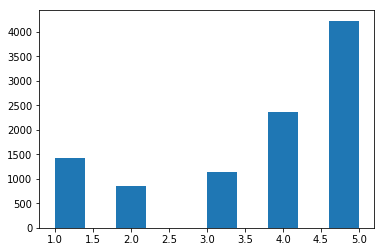

In [36]:
plt.hist(y_test)

In [37]:
# Predicted Target Values

(array([1536.,    0.,   93.,    0.,    0.,  110.,    0.,  689.,    0.,
        7572.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

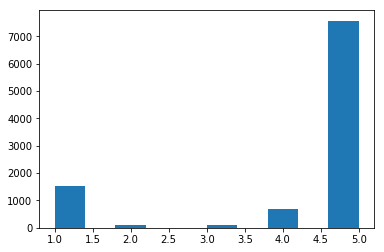

In [38]:
plt.hist(y_test_pred)